In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
print(sys.path)

['', '/Users/chenchen/anaconda2/envs/py36/lib/python36.zip', '/Users/chenchen/anaconda2/envs/py36/lib/python3.6', '/Users/chenchen/anaconda2/envs/py36/lib/python3.6/lib-dynload', '/Users/chenchen/anaconda2/envs/py36/lib/python3.6/site-packages', '/Users/chenchen/anaconda2/envs/py36/lib/python3.6/site-packages/aeosa', '/Users/chenchen/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/extensions', '/Users/chenchen/.ipython']


In [3]:
df = pd.read_csv('data_processed_sample10000.csv',encoding = 'latin-1',lineterminator='\n')

In [8]:
from sklearn.model_selection import train_test_split
cols = [i for i in df.columns if i != 'hammer_price']
X = df[cols]
Y = df.hammer_price

print(X[0:5])
print(Y[0:5])

# Split our data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.20, random_state=1)

   artist_birth_year  artist_death_year  estimate_high  estimate_low  \
0               1937        1980.141893       9.903538      9.615872   
1               1933        1980.141893       8.294300      8.006701   
2               1948        1980.141893       8.006701      7.601402   
3               1937        1980.141893       8.853808      8.517393   
4               1898        1986.000000      12.611541     12.206078   

   measurement_depth_cm  measurement_height_cm  measurement_width_cm  \
0                   0.0               3.891820              3.891820   
1                   0.0               4.127134              4.700480   
2                   0.0               2.639057              2.397895   
3                   0.0               4.248495              3.951244   
4                   0.0               4.248495              4.248495   

   year_of_execution  auction_year  artist_alive_year         ...           \
0           7.592870             0           0.000000   

In [9]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

2.7101507823249049

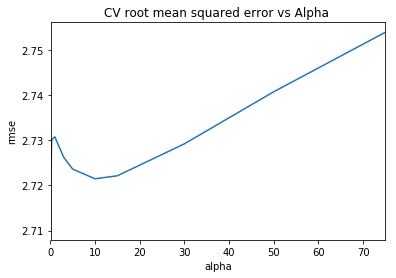

In [57]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean()
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "CV root mean squared error vs Alpha ")
plt.xlabel("alpha")
plt.ylabel("rmse")
cv_ridge.min()

In [58]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, Y_train)
rmse_cv(model_lasso)

/Users/chenchen/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/chenchen/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/chenchen/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/chenchen/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_desc

array([ 2.6412831 ,  2.72903947,  2.73206066,  2.88951322,  2.64826709])

In [86]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
#print([i for i in coef.index if coef[i]!=0])
coef.sort_values()

location_Lambertville              -3.390162
artist_name_Anish Kapoor           -2.868725
artist_name_John McCracken         -2.787380
artist_name_Rudolf Stingel         -2.782166
location_Amsterdam                 -2.699588
artist_name_Roni Horn              -2.458904
artist_name_Robert Marc            -2.154938
location_Naples                    -2.094997
location_Philadelphia              -1.975162
location_Rome                      -1.793593
artist_name_Auguste Rodin          -1.584341
location_Vienna                    -1.383272
location_South Kensington          -1.346940
artist_name_Louise Bourgeois       -1.307155
location_Chicago                   -1.210826
artist_name_Anselm Kiefer          -1.206913
artist_name_Tracey Emin            -1.006141
estimate_high                      -0.975296
location_Berlin                    -0.944857
artist_name_Eugene Boudin          -0.933748
artist_name_Gustave Loiseau        -0.928513
category_Collage                   -0.927238
year_of_ex

Text(0.5,1,'Coefficients in the Lasso Model')

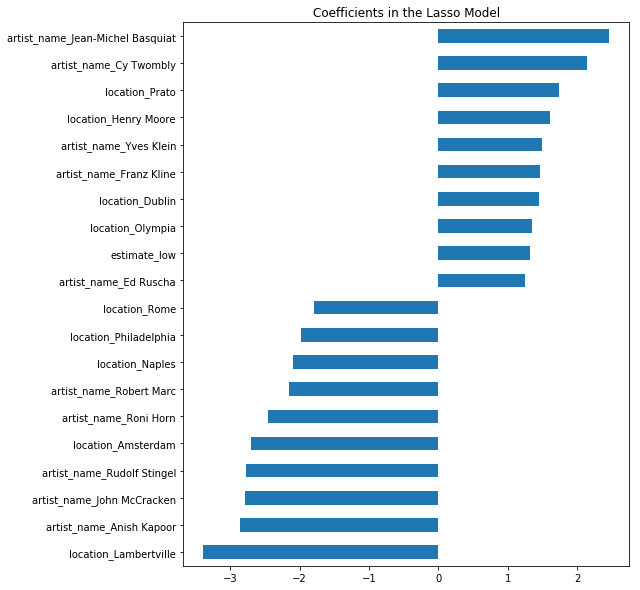

In [87]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

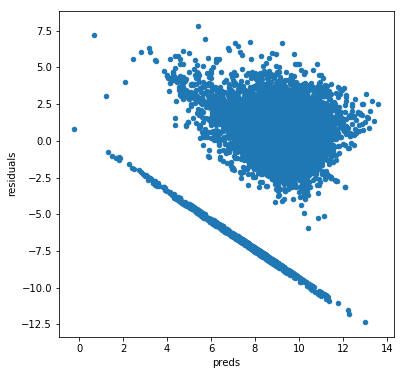

In [89]:
## why do we look at residuals????
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":Y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")


In [33]:
import xgboost as xgb
print(sys.path)

['', '/Users/chenchen/anaconda2/envs/py36/lib/python36.zip', '/Users/chenchen/anaconda2/envs/py36/lib/python3.6', '/Users/chenchen/anaconda2/envs/py36/lib/python3.6/lib-dynload', '/Users/chenchen/anaconda2/envs/py36/lib/python3.6/site-packages', '/Users/chenchen/anaconda2/envs/py36/lib/python3.6/site-packages/aeosa', '/Users/chenchen/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/extensions', '/Users/chenchen/.ipython']


In [34]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

AttributeError: module 'xgboost' has no attribute 'DMatrix'

In [32]:
print( '1234,%d'%(5))

1234,5


In [ ]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [ ]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

In [ ]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

In [ ]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [ ]:
preds = 0.7*lasso_preds + 0.3*xgb_preds
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)

In [2]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'keras'

In [ ]:
X_train = StandardScaler().fit_transform(X_train)

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, random_state = 3)

In [ ]:
X_tr.shape

In [ ]:
X_tr

In [ ]:
model = Sequential()
#model.add(Dense(256, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(1, input_dim = X_train.shape[1], W_regularizer=l1(0.001)))

model.compile(loss = "mse", optimizer = "adam")

In [ ]:
model.summary()

In [ ]:
hist = model.fit(X_tr, y_tr, validation_data = (X_val, y_val))

In [ ]:
pd.Series(model.predict(X_val)[:,0]).hist()